<a href="https://colab.research.google.com/github/eminekilics/phishing-email-checking/blob/main/phishing_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
try:
    df = pd.read_csv('Phishing_Email.csv', on_bad_lines='skip', engine='python')
    print("data loaded succesfully")

except Exception as e:
    print(f"error: {e}")

error: [Errno 2] No such file or directory: 'Phishing_Email.csv'


In [64]:
print(df.head())

                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             subject  \
0                          Never agree to be a loser   
1  

In [65]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

print("\n--- null value check ---")
print(df.isnull().sum())

df.dropna(subset=['subject'], inplace=True)

print(f"\n cleaned dataset shape: {df.shape}")


--- null value check ---
sender                    0
receiver                 19
date                      0
subject                   0
body                      0
label                     0
urls                      0
full_text                 0
url_count                 0
exclamation_count         0
suspicious_word_count     0
clean_text                0
dtype: int64

 cleaned dataset shape: (1801, 12)


In [66]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Train set: (1440,)
Test set: (361,)


In [67]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

In [68]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()


Model Accuracy: %98.34

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       159
           1       0.99      0.99      0.99       202

    accuracy                           0.98       361
   macro avg       0.98      0.98      0.98       361
weighted avg       0.98      0.98      0.98       361


--- Confusion Matrix ---


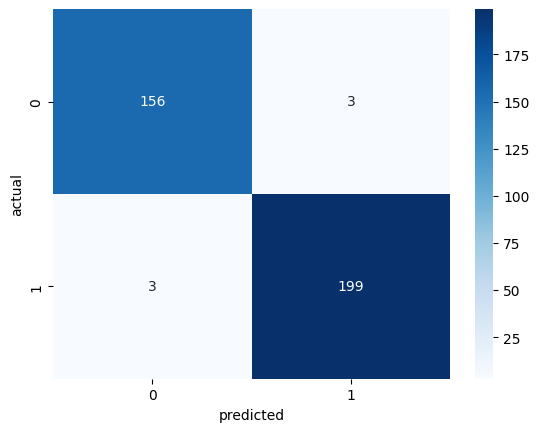

In [69]:
y_pred = model.predict(X_test_tfidf)

print(f"\nModel Accuracy: %{accuracy*100:.2f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [70]:
def predict_email(email_content):
    email_vector = tfidf.transform([email_content])
    prediction = model.predict(email_vector)

    if prediction[0] == 1:
        return "This looks like a Phishing Email"
    else:
        return "This email looks safe."

sample_email_1 = "Congratulations! You have won a lottery. Click here to claim your prize."
sample_email_2 = "Meeting is scheduled for tomorrow at 10 AM. Please bring your reports."

print("\n--- ReaWorld Tests ---")
print(f"Email 1: {predict_email(sample_email_1)}")
print(f"Email 2: {predict_email(sample_email_2)}")


--- ReaWorld Tests ---
Email 1: This looks like a Phishing Email
Email 2: This email looks safe.
